In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [18]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [19]:
df = pd.read_csv("knn_telecom.csv")

In [20]:
df = df.loc[:, ~df.columns.str.lower().str.contains("id")]

In [21]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [22]:
x=df.drop("Churn",axis=1)
y=df["Churn"]



In [23]:
numeric_features=x.select_dtypes(include=["int64","float64"]).columns
categorical_features=x.select_dtypes(include=["object"]).columns


In [28]:
preprocessor =ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),numeric_features),
        ("cat",OneHotEncoder(drop="first"),categorical_features)
    ])

In [29]:
skf = StratifiedKFold(n_splits = 5 , shuffle = True, random_state = 42)

In [30]:
k_values = range(1, 16)
cv_scores = []

In [31]:
for k in k_values:
    model = Pipeline([
        ("preprocessing", preprocessor),
        ("knn",KNeighborsClassifier(n_neighbors = k))
    ])
    scores = cross_val_score(model, x, y, cv = skf, scoring = "accuracy")
    cv_scores.append(scores.mean())

for k, score in zip(k_values, cv_scores):
    print(f"K = {k} | CV Accuracy = {round(score, 4)}")

best_k = k_values[np.argmax(cv_scores)]
print("\nBest K Selected:",best_k)

K = 1 | CV Accuracy = 0.9533
K = 2 | CV Accuracy = 0.94
K = 3 | CV Accuracy = 0.9667
K = 4 | CV Accuracy = 0.96
K = 5 | CV Accuracy = 0.96
K = 6 | CV Accuracy = 0.96
K = 7 | CV Accuracy = 0.96
K = 8 | CV Accuracy = 0.9667
K = 9 | CV Accuracy = 0.96
K = 10 | CV Accuracy = 0.96
K = 11 | CV Accuracy = 0.96
K = 12 | CV Accuracy = 0.96
K = 13 | CV Accuracy = 0.9667
K = 14 | CV Accuracy = 0.9667
K = 15 | CV Accuracy = 0.96

Best K Selected: 3


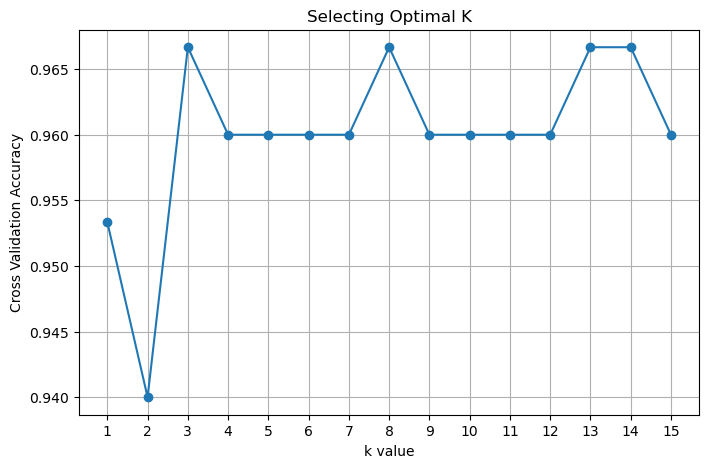

In [36]:
plt.figure(figsize=(8,5))
plt.plot(k_values,cv_scores, marker='o')
plt.xlabel("k value")
plt.ylabel("Cross Validation Accuracy")
plt.title("Selecting Optimal K")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [38]:
final_model=Pipeline([
    ("preprocessing",preprocessor),
    ("knn",KNeighborsClassifier(n_neighbors=best_k))
     ])
final_model.fit(x,y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Tenure', 'MonthlyUsage'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Gender', 'PlanType'], dtype='object'))])),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [41]:
user_data = {
    "Age":40,
    "Gender":"Male",
    "PlanType":"Premium",
    "Tenure": 12,
    "MonthlyUsage":350
}
user_df = pd.DataFrame([user_data])

prediction = final_model.predict(user_df)[0]
probability = final_model.predict_proba(user_df)[0]

print("\nUser Input:")
print(user_df)

print("\nPredicted Churn:", prediction)
print("\nPredicted Probability:", probability)


User Input:
   Age Gender PlanType  Tenure  MonthlyUsage
0   40   Male  Premium      12           350

Predicted Churn: 1

Predicted Probability: [0. 1.]
